# California Area House Price Prediction 

In [74]:
#import modules and data

import pandas as pd
from sklearn.model_selection import train_test_split



I load the data and view see what columns it has. I remove the Id column

In [164]:
data=pd.read_csv('data/Cali_housing.csv')
print(data.shape)
data.head()


(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Here is some data pre-processing. 207 entries have N/A for total_bedrooms. This is very few compared to the sample size and there doesn't appear to be any connection between N/A entries and the rest of the data, so I conclude dropping these entries will be unlikely to significantly affect the prediction model.

The ocean_proximity field is non-quantitative. There are 5 unique entries.

In [165]:
from sklearn.preprocessing import OneHotEncoder

print("null data entries: ")
print(data.isnull().sum(),"\n")
drop_na_data=data.dropna(axis=0)



print("cardinality of 'ocean proximity': ", data.ocean_proximity.nunique(),"\n")
OH_encoder=OneHotEncoder(handle_unknown='ignore', sparse_output=False)
OH_cols=pd.DataFrame(OH_encoder.fit_transform(pd.DataFrame(drop_na_data['ocean_proximity'])))
OH_cols.index=drop_na_data.index
OH_cols.columns=OH_cols.columns.astype(str)
pre_processed_data=pd.concat([drop_na_data.drop('ocean_proximity',axis=1),OH_cols],axis=1)

print("pre-processed data shape: ", pre_processed_data.shape)



null data entries: 
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64 

cardinality of 'ocean proximity':  5 

pre-processed data shape:  (20433, 14)


In [166]:
pre_processed_data.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,0,1,2,3,4
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0


In [167]:
y_full=pre_processed_data.median_house_value
x_full=pre_processed_data.drop('median_house_value',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_full, y_full, test_size=0.2, train_size=0.8, random_state=1)

In [168]:
print(x_train.shape, x_test.shape)

(16346, 13) (4087, 13)


In [169]:
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense

def model_1(input_size=(13,), layer_1=5, layer_2=5):
    inputs=Input(input_size)
    X=Dense(layer_1, activation='relu')(inputs)
    X=Dense(layer_2, activation='relu')(X)
    y=Dense(1, activation='relu')(X)
    model = tf.keras.Model(inputs=inputs, outputs=y)
    return model

In [181]:
model=model_1(layer_1=5, layer_2=5)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense_9 (Dense)             (None, 5)                 70        
                                                                 
 dense_10 (Dense)            (None, 5)                 30        
                                                                 
 dense_11 (Dense)            (None, 1)                 6         
                                                                 
Total params: 106
Trainable params: 106
Non-trainable params: 0
_________________________________________________________________


In [182]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [183]:
model_history = model.fit(x_train, y_train,
                    epochs=500,
                    batch_size=128, verbose=1)

Epoch 1/500
128/128 [==============================] - 1s 2ms/step - loss: 55589130240.0000 - mae: 205622.8281
Epoch 2/500
128/128 [==============================] - 0s 1ms/step - loss: 53805801472.0000 - mae: 201393.2500
Epoch 3/500
128/128 [==============================] - 0s 2ms/step - loss: 49451184128.0000 - mae: 190299.6719
Epoch 4/500
128/128 [==============================] - 0s 1ms/step - loss: 41898954752.0000 - mae: 169184.8125
Epoch 5/500
128/128 [==============================] - 0s 2ms/step - loss: 33110321152.0000 - mae: 142069.9844
Epoch 6/500
128/128 [==============================] - 0s 1ms/step - loss: 28358373376.0000 - mae: 125423.0078
Epoch 7/500
128/128 [==============================] - 0s 1ms/step - loss: 27152013312.0000 - mae: 120315.4609
Epoch 8/500
128/128 [==============================] - 0s 1ms/step - loss: 26907363328.0000 - mae: 118825.1719
Epoch 9/500
128/128 [==============================] - 0s 1ms/step - loss: 26787952640.0000 - mae: 118232.1094
E

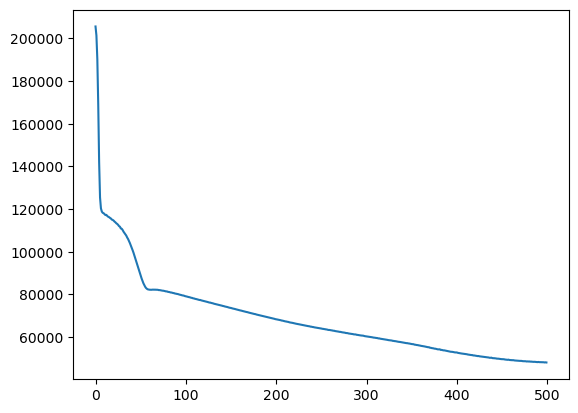

In [184]:
import matplotlib.pyplot as plt

plt.plot(model_history.history["mae"])

In [186]:
from sklearn.metrics import mean_absolute_error

test_predictions=model.predict(x_test)
train_predictions=model.predict(x_train)

print("test error: ", mean_absolute_error(y_test, test_predictions))
print("train error: ", mean_absolute_error(y_train, train_predictions))


511/511 [==============================] - 0s 827us/step
test error:  48021.37142062485
train error:  48105.340887105405
